### Neural Computation: methods to solve binary classification

Objective: find optimal parameters for binary classification problem given data set with 4 features and 8 data points.

Find optimal parameters using the following methods:
* implement the `gradient descent` method
* implement the `stochastic gradient descent` method
* implement the `momentum` method
* implement the `adaptive gradient descent` method
* implement the `perceptron` method

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

### Create Data Set
$\mathbf{X}$ is an 8x4 matrix with 4 features and 8 datapoints (examples).\
$\mathbf{y}$ contains the correct output (labels) to use for learning parameters.

In [8]:
# Creating data set D
X = np.array([[-0.5, 0.25, -0.8, -1],
               [-1, -0.1, -0.1, -1],
               [0.5, 0, 0.25, 0.1],
               [-0.2, -0.3, 0.2, 0],
               [-0.8, 0, -0.8, -1],
               [-0.15, -0.5, 0.05, -0.25],
               [-1, 0, -1, -1],
               [0, -0.25, 0.25, 0.1]])

y = np.array([1, 1, -1, -1, 1, -1, 1, -1])

### Problem Definition
Consider a linear model for classification $\mathbf{x} \rightarrow \mathbf{w}^\top \mathbf{x}$, where $\mathbf{w} = (w_1,w_2,w_3,w_4)^\top \in \mathbb{R}^4$. Minimize the objective function (for simplicity the bias is not considered in the linear model):
$$C(\mathbf{w}) = \frac{1}{n}\sum^n_{i=1}C_{i}(\mathbf{w}),$$
where
$$
C_i(\mathbf{w}) = \left\{
    \begin{array}{ll}
        0,\mbox{ if } y^{(i)} \mathbf{w}^\top \mathbf{x}^{(i)} \ge 1\\
        \frac{1}{2}(1 - {y}^{(i)} \mathbf{w}^\top \mathbf{x}^{(i)})^2, \mbox{ otherwise.}
    \end{array}
\right.
$$
From this the gradient can be derived:
$$
\nabla C_i(\mathbf{w}) = \left\{
    \begin{array}{ll}
        0,\mbox{ if } y^{(i)} \mathbf{w}^\top \mathbf{x}^{(i)} \ge 1\\
        {y}^{(i)}({y}^{(i)} \mathbf{w}^\top \mathbf{x}^{(i)} -1)\mathbf{x}^{(i)}, \mbox{ otherwise.}
    \end{array}
\right.
$$
and
$$\nabla C(\mathbf{w}) = \frac{1}{n}\sum^n_{i=1}\nabla C_{i}(\mathbf{w})$$

In [9]:
def cost(w, X, y):
    N,D = X.shape
    err = 0
    for i in range(N):
        m = np.dot(X[i,:],w)*y[i]
        if m < 1:
            err += 0.5*(1 - m)**2
        
    return err/N

In [10]:
def grad(w, X, y):
    N,D = X.shape
    grad = np.zeros(D)
    for i in range(N):
        m = np.dot(y[i],np.dot(X[i,:],w))
        if m >= 1:
            grad = grad
        else:
            grad = grad + np.dot(np.dot((m - 1),y[i]),X[i,:])
    grad = grad/8
    
    return grad

### Solve using Gradient Descent
Gradient Descent iteratively updates the model by moving along the negative direction
$$\mathbf{w}^{(t+1)} \leftarrow \mathbf{w}^{(t)} - \eta\nabla C(\mathbf{w}^{(t)}),$$ 
where $\eta$ is a learning rate and $\nabla C(w^{(t)})$ is the gradient evaluated at current parameter value $\mathbf{w}^{(t)}$.
\
\
Let $\mathbf{w}^{(0)} = (0,0,0,0)^\top$ and step size $\eta_t = \eta = 0.5$. Return $\mathbf{w}^{(25)}$.

In [11]:
def gradient_descent(X, y):
    
    w = np.zeros([4])
    eta = 0.5
    
    for k in range(25):
        w = w - 0.5 * grad(w, X, y)

    return w

In [12]:
gd = gradient_descent(X,y)
print("With Gradient Descent, w(25):", gd)

With Gradient Descent, w(25): [-0.527  1.22  -1.047 -0.445]


### Solve using Stochastic Gradient Descent
Suppose at the t-th iteration, the index sampled is $i_t$. Following from the equation for Gradient Descent above, the update for Stochastic Gradient Descent (SGD) i.e., taking a single example is the following:
\
\
$$
\nabla \mathbf{w}^{(t+1)} \leftarrow \mathbf{w}^{(t)} - \eta\nabla C(\mathbf{w}^{(t)}) = \left\{
    \begin{array}{ll}
        \mathbf{w}^{(t)},\mbox{ if } y^{(i)} \mathbf{w}^\top \mathbf{x}^{(i)} \ge 1\\
        \mathbf{w}^{(t)} - \eta_t{y}^{(i)}({y}^{(i)} \mathbf{w}^\top \mathbf{x}^{(i)} -1)\mathbf{x}^{(i)}, \mbox{ otherwise.}
    \end{array}
\right.
$$
\
Let $\mathbf{w}^{(0)} = (0,0,0,0)^\top$ and $\eta_t = \eta = 0.1$. Let $i_t =$ (t mod 8). Return $\mathbf{w}^{(80)}$.

In [27]:
def stochastic_gd(X, y):

    w = np.zeros([4])
    
    for k in range(80):
        i = k % 8
        m = np.dot(y[i],np.dot(X[i,:],w))
        if m >= 1:
            w = w
        else:
            w = w - 0.1 * np.dot(np.dot((m - 1),y[i]),X[i,:])

    return w

In [28]:
sgd = stochastic_gd(X, y)
print("With Stochastic Gradient Descent (SGD) w(80):", sgd)

With Stochastic Gradient Descent (SGD) w(80): [-0.469  0.89  -0.799 -0.449]


### Solve using momentum
Momentum introduces a variable __velocity__ to store the historical information of the gradients. At each iteration, it updates __velocity__ as a factor of the current __velocity__ minus the __learning rate__ times the __current gradient__:
\
\
$$\mathbf{v}^{(t+1)} = \alpha\mathbf{v}^{(t)}-\eta\nabla C(\mathbf{w}^{(t)}),$$ \
where $\eta$ is a learning rate, $\alpha\in(0,1)$ is a parameter and $\nabla C(w^{(t)}$ is the gradient evaluated at current parameter value $\mathbf{w}^{(t)}$.
Then,the next iterate updates as \
\
$$\mathbf{w}^{(t+1)}=\mathbf{w}^{(t)}+\mathbf{v}^{(t+1)}.$$
\
Let $\mathbf{w}^{(0)} = (0,0,0,0)^\top$, $\eta_t = \eta = 0.5$ and $\alpha = 0.5$. Return $\mathbf{w}^{(25)}$.

In [29]:
def momentum(X, y):
    
    w = np.zeros([4])
    v = np.zeros([4])
    
    for k in range(25):
        v = 0.5*v - 0.5 * grad(w, X, y)
        w = w + v

    return w

In [30]:
mv = momentum(X, y)
print("With Momentum w(25):", mv)

With Momentum w(25): [-0.598  1.829 -1.557 -0.502]


### Solve using Adaptive Gradient Descent
Stochastic gradient descent uses the same learning rates for all the features. This can be problematic if there are some sparse and predictive features. The underlying reason is that there are few examples with non-zero values for the sparse features, and it is often the case that SGD will choose an example with a zero for the sparse feature. Then it would not update the corresponding coordinate in this case. This motivates the need to slow down the update of some coordinates if there is already a frequent update on that coordinate, and accelerate the update if there are few updates on that coordinate.

The key idea of __Adagrad__ is to introduce a vector $\mathbf{r}$ to store the accumulated gradient norm square. Initialise $\mathbf{r}^{(0)}=0$ and update
$$ 
\mathbf{r}^{(t+1)}=\mathbf{r}^{(t)}+\hat{\mathbf{g}}^{(t)}\odot\hat{\mathbf{g}}^{(t)},
$$
\
where $\hat{\mathbf{g}}^{(t)}$ can be a stochastic gradient built based on a selected example or a minibatch of examples. The idea is to slow down the update on a coordinate if there are already many updates on that coordinate in the history, and speed up the update on a coordinate if there are few updates in the history. This can be achieved by dividing the parameter $\eta$ with $\sqrt{\mathbf{r}^{(t+1)}}$. That is
$$
\mathbf{w}^{(t+1)}\gets\mathbf{w}^{(t)}-\frac{\eta}{\delta+\sqrt{\mathbf{r}^{(t+1)}}}\odot \hat{\mathbf{g}}^{(t)} 
$$
\
Using __Adagrad__, there are different learning rates on different coordinates. \
\
Let $\mathbf{w}^{(0)} = (0,0,0,0)^\top$, $\eta_t = \eta = 0.1$ and $\delta = 10^{-6}$. Let $i_t =$ (t mod 8). Return $\mathbf{w}^{(80)}$.

In [31]:
def adaptive_gd(X, y):
    
    w = np.zeros([4])
    r = np.zeros([4])
    g = np.zeros([4])
    delta = 1e-6
    
    for k in range(80):
        i = k % 8
        
        m = np.dot(y[i],np.dot(X[i,:],w))
        if m >= 1:
            w = w
        else:
            alpha = np.dot(X[i,:],w) - y[i]
            g = alpha * X[i,:]
            r = r + g*g
            w = w - (0.1/(delta+np.sqrt(r)))*g
    
    return w

In [32]:
adagrad = adaptive_gd(X, y)
print("With Adaptive Gradient Descent (AGD) w(80):", adagrad)

With Adaptive Gradient Descent (AGD) w(80): [-0.478  0.849 -0.722 -0.38 ]


### Perceptron
A perceptron takes the form
$$\mathbf{x}\mapsto \text{sgn}(\mathbf{w}^\top\mathbf{x}+b),$$
where $\mathbf{w}$ is the weight vector and $b$ is the bias. Here $\text{sgn}(a)$ returns the sign of $a$.  Then it predicts $\mathbf{x}$ to be a positive example if $\mathbf{w}^\top\mathbf{x}+b>0$ and negative otherwise. According to the prediction scheme, this model misclassifies an example $(\mathbf{x},y)$ if $y(\mathbf{w}^\top\mathbf{x}+b)\leq0$.

### Perceptron Algorithm
The perceptron algorithm tries to find $\mathbf{w}$ and $b$. The basic idea is to traverse the dataset and update the model if it encouters a misclassified example. Suppose $(\mathbf{x},y)$ is a misclassified example, then it updates the model by
$$
\mathbf{w}\gets \mathbf{w}+y\mathbf{x}\quad b\gets b+y.
$$
It is then clear that
$$
y(b+y+(\mathbf{w}+y\mathbf{x})^\top\mathbf{x})=yb+y\mathbf{w}^\top\mathbf{x}+y^2+y^2\mathbf{x}^\top\mathbf{x}>
y(b+\mathbf{w}^\top\mathbf{x}).
$$
That is, after an update the perceptron is more likely to classify correctly the example $(\mathbf{x},y)$.\
\
Let $\mathbf{w}^{(0)} = (0,0,0,0)^\top$ and traverse the data set once in order. Return $\mathbf{w}^8$.

In [19]:
def perceptron(X, y):
    
    w = np.zeros([4])

    for i in range(8):
        m = np.dot(X[i,:],w)*y[i]
        if m <= 0:
            w += np.dot(y[i],X[i,:])
        
    return w

In [20]:
p = perceptron(X, y)
print("With Perceptron algorithm w:", p)

With Perceptron algorithm w: [-0.35  0.75 -0.85 -0.75]


### Visualising Results
Visualising the results with two charts. The first chart compares the model prediction vs the correct training y value for each method and example in the data. The second chart compares the total cost (loss) when using the parameters returned for each method.

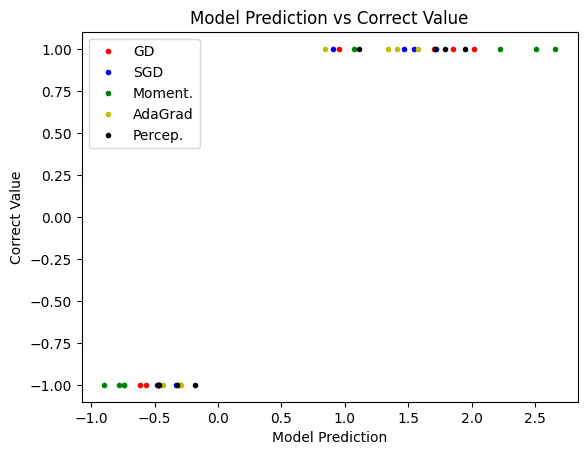

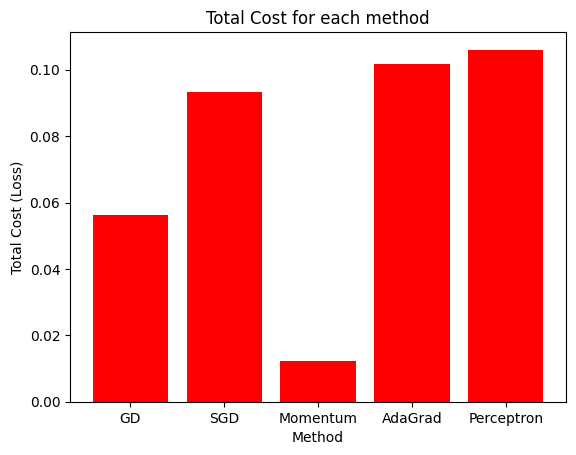

In [103]:
plt.figure()
plt.plot(np.dot(X,gd),y,'r.',label='GD')
plt.plot(np.dot(X,sgd),y,'b.',label='SGD')
plt.plot(np.dot(X,mv),y,'g.',label='Moment.')
plt.plot(np.dot(X,adagrad),y,'y.',label='AdaGrad')
plt.plot(np.dot(X,p),y,'k.',label='Percep.')
plt.xlabel('Model Prediction')
plt.ylabel('Correct Value')
plt.legend()
plt.title("Model Prediction vs Correct Value")
plt.show()

x = ['GD', 'SGD', 'Momentum', 'AdaGrad', 'Perceptron']
costs = [cost(gd,X,y), cost(sgd,X,y), cost(mv,X,y), cost(adagrad,X,y), cost(p,X,y)]
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, costs, color='red')
plt.xlabel("Method")
plt.ylabel("Total Cost (Loss)")
plt.title("Total Cost for each method")
plt.xticks(x_pos, x)
plt.show()


The visualisation shows that if the sign is used to determine a positive or negative classification ($\text{sgn}(\mathbf{w}^\top\mathbf{x})$), all parameters returned would deliver correct predictions and the total cost for each method when taking the sign function of the prediction would be 0. \
\
Based on the bar chart above, the Momentum method was the most accurate. However, further data  (examples and labels) would be required to generate validation and test sets to determine if the parameters returned by each model generalise well to unseen data.